# Analysis of people were likely to survive in Titanic shipwreck happened in      1912

## Problem statement
The sinking of the RMS Titanic is one of the most infamous shipwrecks in
history. On April 15, 1912, during her maiden voyage, the Titanic sank after
colliding with an iceberg, killing numerous passengers and crew. This
sensational tragedy shocked the international community and led to better
safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there
were not enough lifeboats for the passengers and crew. Although there was
some element of luck involved in surviving the sinking, some groups of people
were more likely to survive than others, such as women, children, and the
upper-class.
In this, we ask you to complete the analysis of what sorts of people were likely
to survive. In particular, we ask you to apply the tools of machine learning to
predict which passengers survived the tragedy.

# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Reading the data

In [3]:
Titanic_data = pd.read_csv(r"C:\Users\akshay\Downloads\train (1).csv")

In [4]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
Titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
Titanic_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
Titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Exploratory data analysis and cleaning

In [7]:
Titanic_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
Titanic_data.shape

(891, 12)

In [10]:
Titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# 1.Null values

In [11]:
#finding out the null values in data
Titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

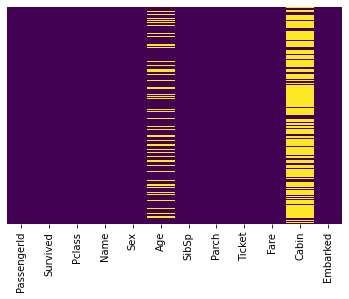

In [12]:
sns.heatmap(Titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Nearly 20-25% of age data is missing.The proportion of age missing is likely small enough for reasonable replacement.
Looking at cabin data,it looks like we are missing too much of the data to something useful so we'll probably drop it.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

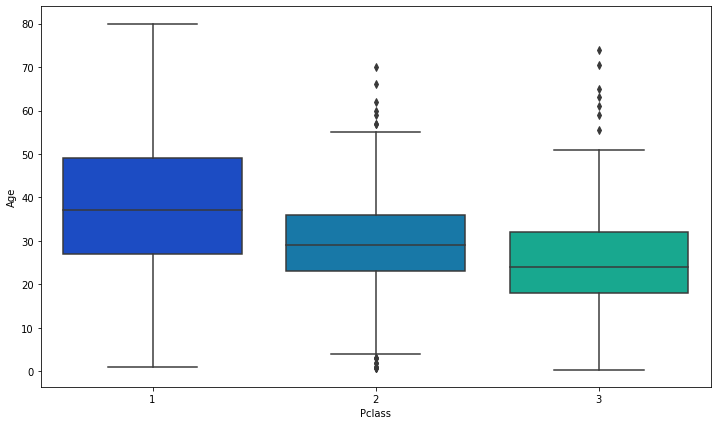

In [13]:
#here we are figuring out avg value of age so that we can put it in missing values
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=Titanic_data,palette='winter')

In [14]:
# Each class has different avg value so imput values accordingly

def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
Titanic_data['Age']=Titanic_data[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

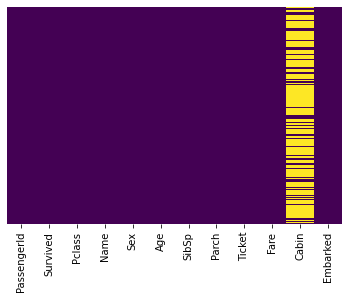

In [16]:
sns.heatmap(Titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
Titanic_data.drop(['Cabin','Ticket','Name','PassengerId'],axis=1,inplace=True)

In [18]:
# Finding the mode value of "Embarked" column
print(Titanic_data["Embarked"].mode())

0    S
dtype: object


In [19]:
print(Titanic_data["Embarked"].mode()[0])

S


In [20]:
# Replacing the missing value in "Embarked" column with the mode value

Titanic_data["Embarked"].fillna(Titanic_data["Embarked"].mode()[0], inplace=True)

In [21]:
Titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
Titanic_data.dropna(inplace=True)

In [23]:
Titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# 2.Data Visualisation

<AxesSubplot:xlabel='Survived', ylabel='count'>

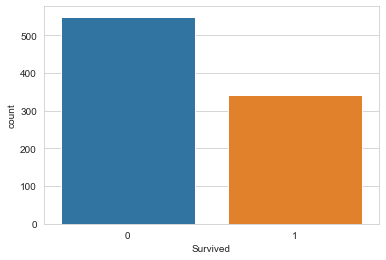

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=Titanic_data)

In [25]:
# finding the number of people survived and not survived

Titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

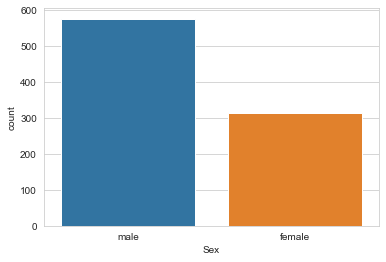

In [26]:
# making a count plot for "Sex" column 
sns.countplot ("Sex", data=Titanic_data )

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

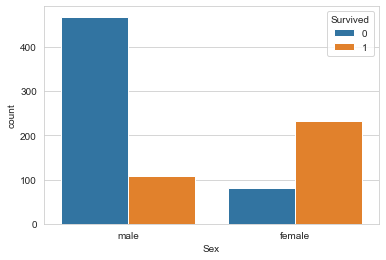

In [27]:
sns.set_style('whitegrid')
sns.countplot('Sex',hue='Survived',data=Titanic_data)

In [28]:
#women survived more compared to men

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


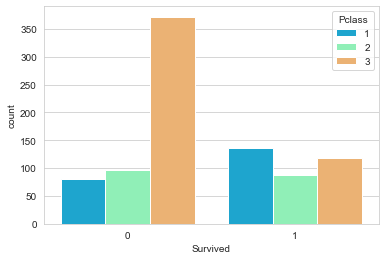

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=Titanic_data,palette='rainbow')

pd.crosstab(Titanic_data['Pclass'],Titanic_data['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

In [30]:
#More people survived from first class compared to second and third class

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

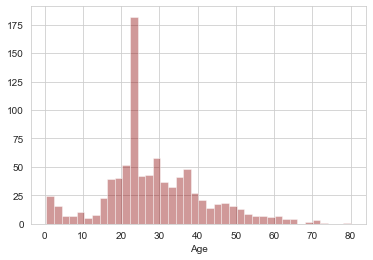

In [31]:
sns.distplot(Titanic_data['Age'].dropna(),kde=False,color='darkred',bins=40)

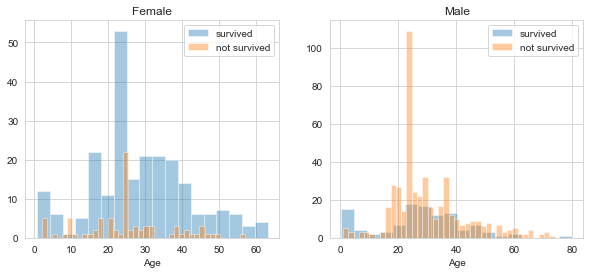

In [32]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = Titanic_data[Titanic_data['Sex']=='female']
men = Titanic_data[Titanic_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
d= ax.set_title('Male')

In [33]:
# Male and female between age group 15-40 likely to survive

<AxesSubplot:xlabel='SibSp', ylabel='count'>

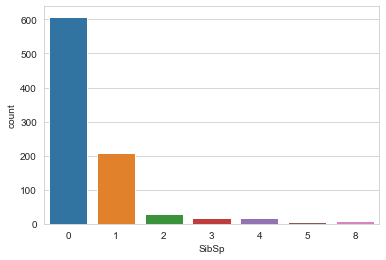

In [34]:
sns.countplot(x='SibSp',data=Titanic_data)

In [35]:
#No. of people travelling alone are more

<AxesSubplot:>

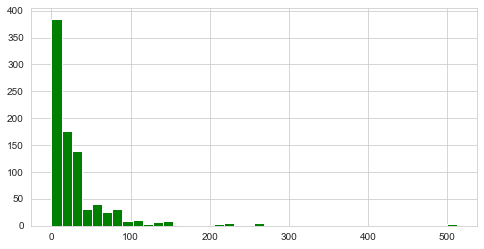

In [36]:
Titanic_data['Fare'].hist(color='green',bins=40,figsize=(8,4))

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

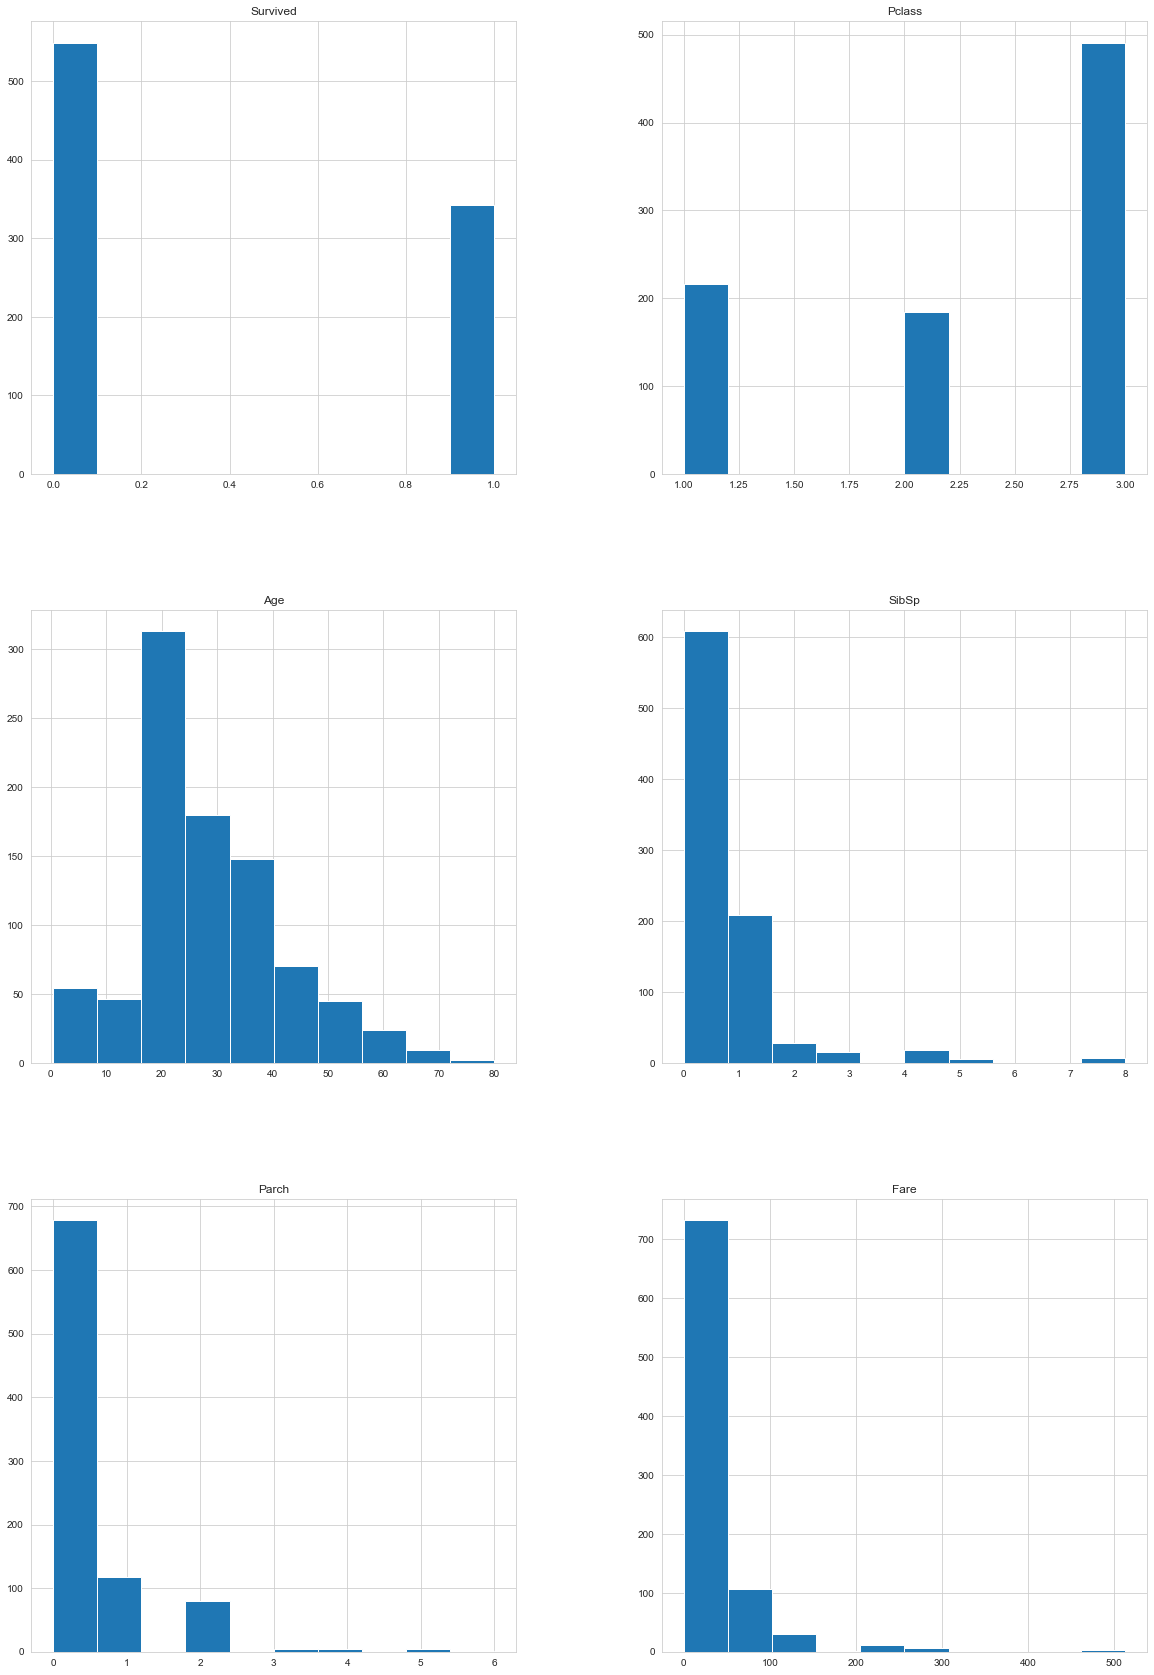

In [37]:
Titanic_data.hist(figsize=(20,30))

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


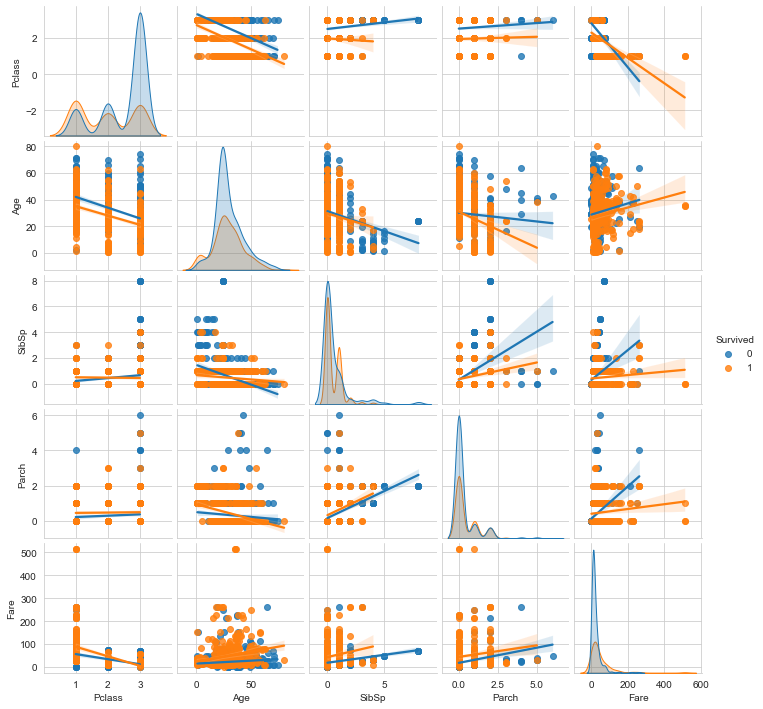

In [38]:
sns.pairplot(Titanic_data, kind = 'reg', hue='Survived' ,size = 2)

<AxesSubplot:>

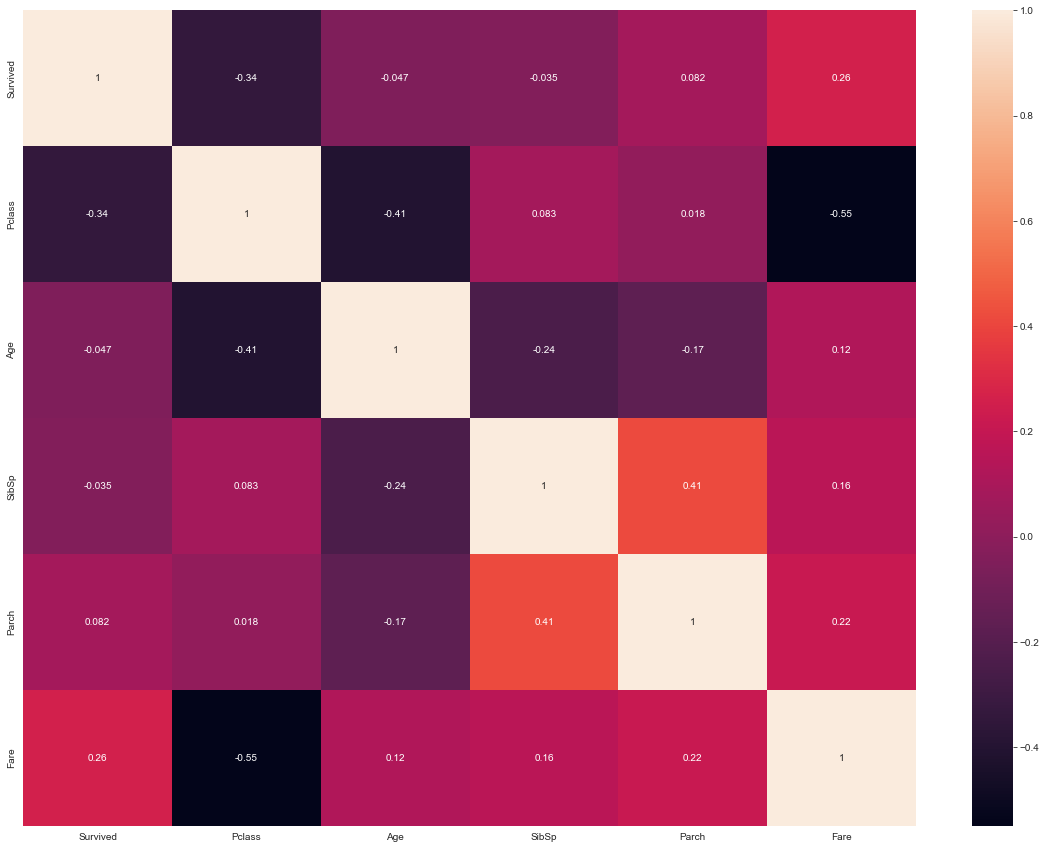

In [39]:
plt.figure(figsize = (20,15))
sns.heatmap(Titanic_data.corr(),annot=True)

Fare,survival,age,sibsp,parch are fairly correlated with each other

In [40]:
pd.pivot_table(Titanic_data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,29.560109,22.117887,0.329690,0.553734
1,28.273889,48.395408,0.464912,0.473684


  1. Average age of surviving people is 28 
  2. people travelling with first class which is having higher fare rates likely to survive 
  3. Childern have higher chance of survival as compared to parents as preference given to children in case life jacket
  4. Survival of person whos having siblings spouse is less


C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.548255729646475
0.7827902752444


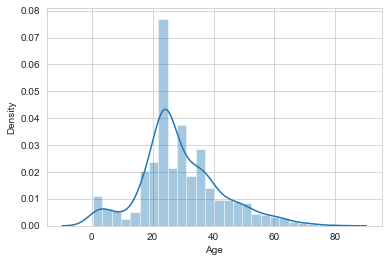

In [41]:
sns.distplot(Titanic_data['Age'])

print(Titanic_data['Age'].skew())

print(Titanic_data['Age'].kurt())

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

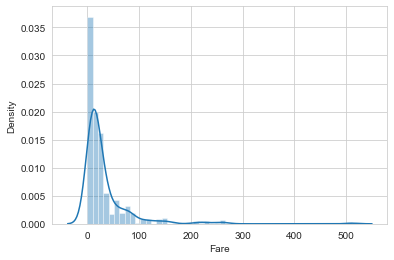

In [42]:
sns.distplot(Titanic_data["Fare"])

In [43]:
#Fare data is highly skewed so it affects our conclusion so we need to remove outliers

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

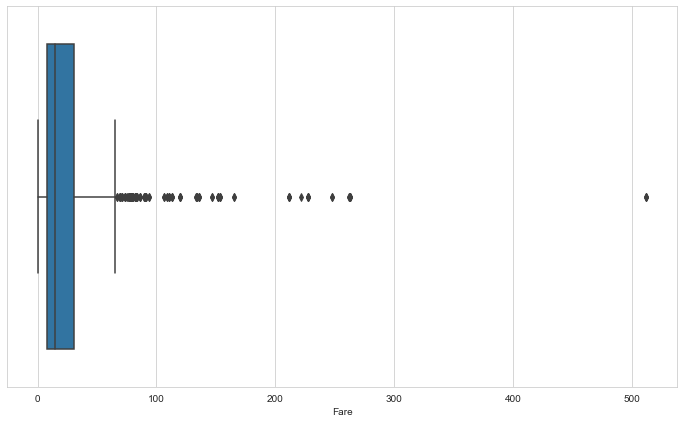

In [44]:
plt.figure(figsize=(12,7))
sns.boxplot(Titanic_data['Fare'])

## Outlier removal

In [45]:
Q1=Titanic_data.Fare.quantile(0.25)
Q3=Titanic_data.Fare.quantile(0.75)
Q1,Q3

(7.9104, 31.0)

In [46]:
IQR=Q3-Q1
IQR

23.0896

In [47]:
print("old shape:",Titanic_data.shape)

old shape: (891, 8)


In [48]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR


In [49]:
Titanic_data[(Titanic_data.Fare < lower_limit)|(Titanic_data.Fare>upper_limit)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
27,0,1,male,19.0,3,2,263.0000,S
31,1,1,female,37.0,1,0,146.5208,C
34,0,1,male,28.0,1,0,82.1708,C
52,1,1,female,49.0,1,0,76.7292,C
...,...,...,...,...,...,...,...,...
846,0,3,male,24.0,8,2,69.5500,S
849,1,1,female,37.0,1,0,89.1042,C
856,1,1,female,45.0,1,1,164.8667,S
863,0,3,female,24.0,8,2,69.5500,S


In [50]:
Titanic_data[(Titanic_data.Fare >lower_limit)&(Titanic_data.Fare<upper_limit)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,24.0,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [51]:
Titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## converting categorical feature 

In [52]:
Titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [53]:
Titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [54]:
a=pd.get_dummies(Titanic_data.Embarked,prefix='Embarked')
a

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [55]:
Titanic_data=Titanic_data.join(a)
Titanic_data.drop(['Embarked'],axis=1,inplace=True)

In [56]:
Titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,0,0,1
1,1,1,female,38.0,1,0,71.2833,1,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,1
4,0,3,male,35.0,0,0,8.0500,0,0,1


In [57]:
Titanic_data.Sex=Titanic_data.Sex.map({'male':0,'female':1})

In [58]:
Titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [60]:
# scale continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Titanic_data[['Age', 'Fare']] = scaler.fit_transform(Titanic_data[['Age', 'Fare']])

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Embarked_C'}>,
        <AxesSubplot:title={'center':'Embarked_Q'}>],
       [<AxesSubplot:title={'center':'Embarked_S'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

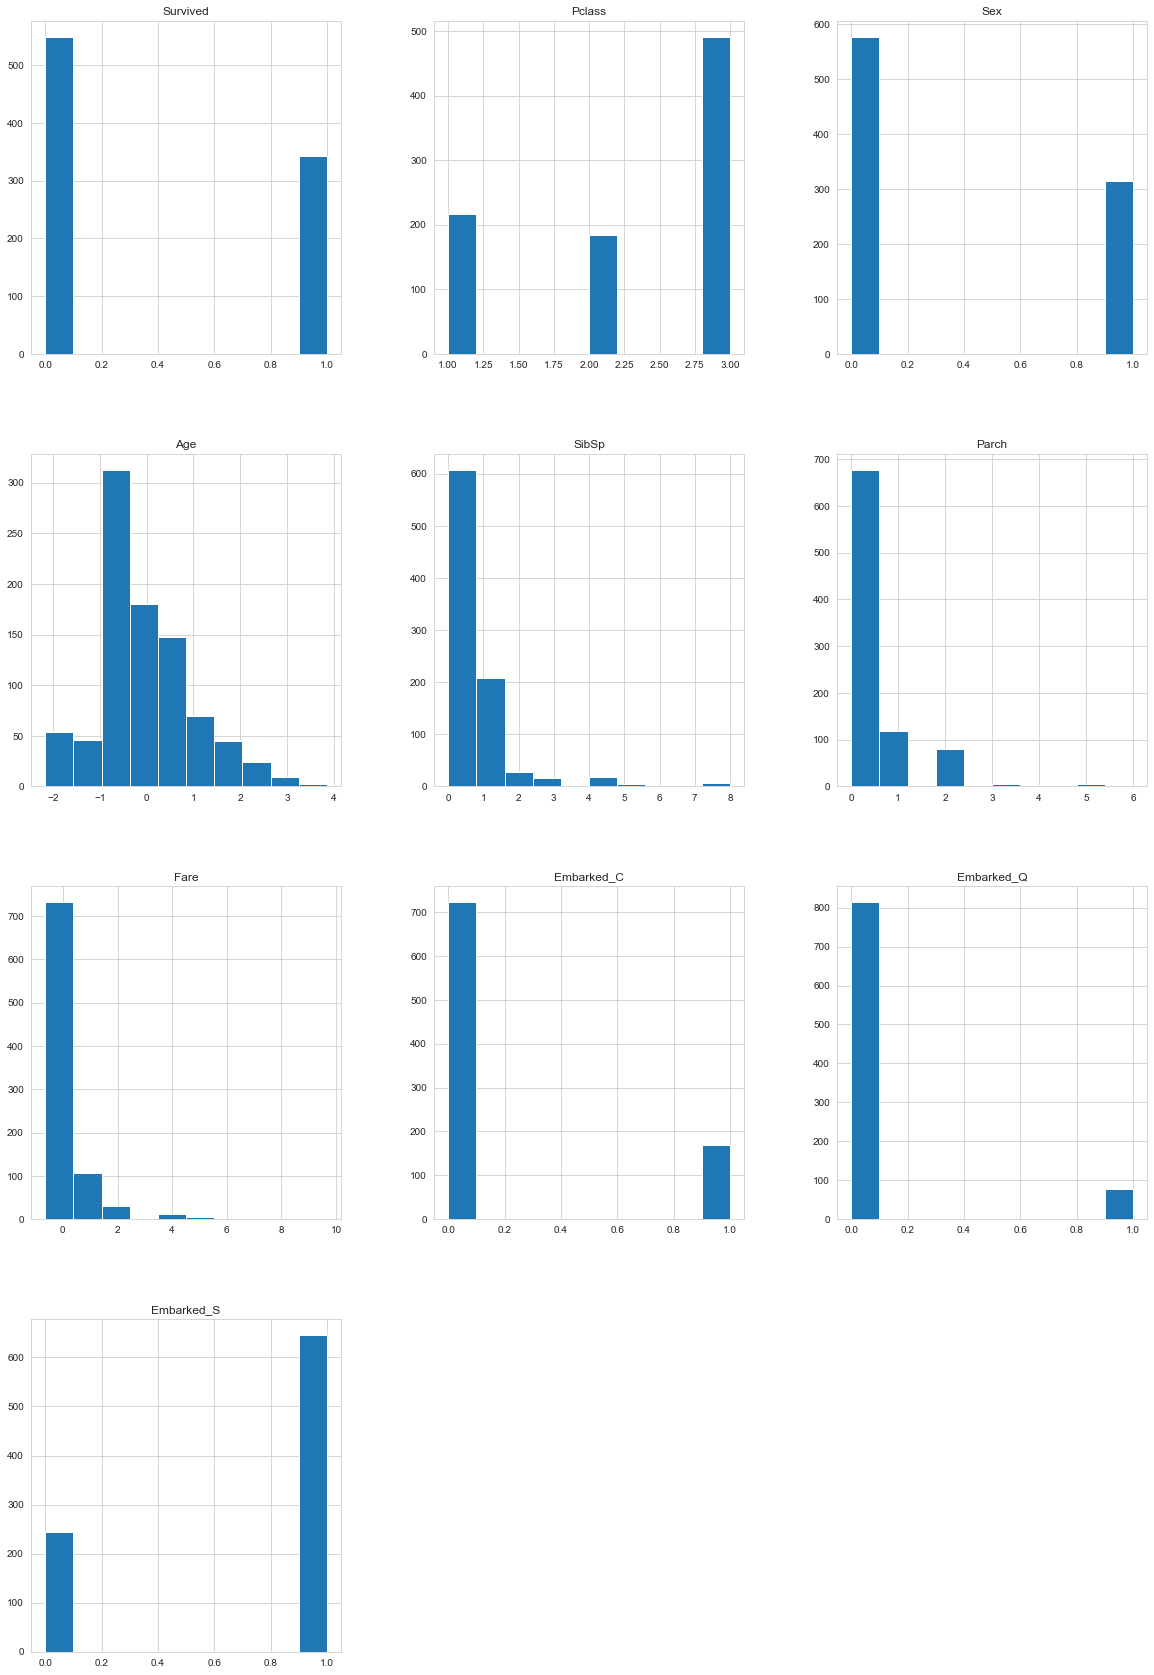

In [61]:
Titanic_data.hist(figsize=(20,30))

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


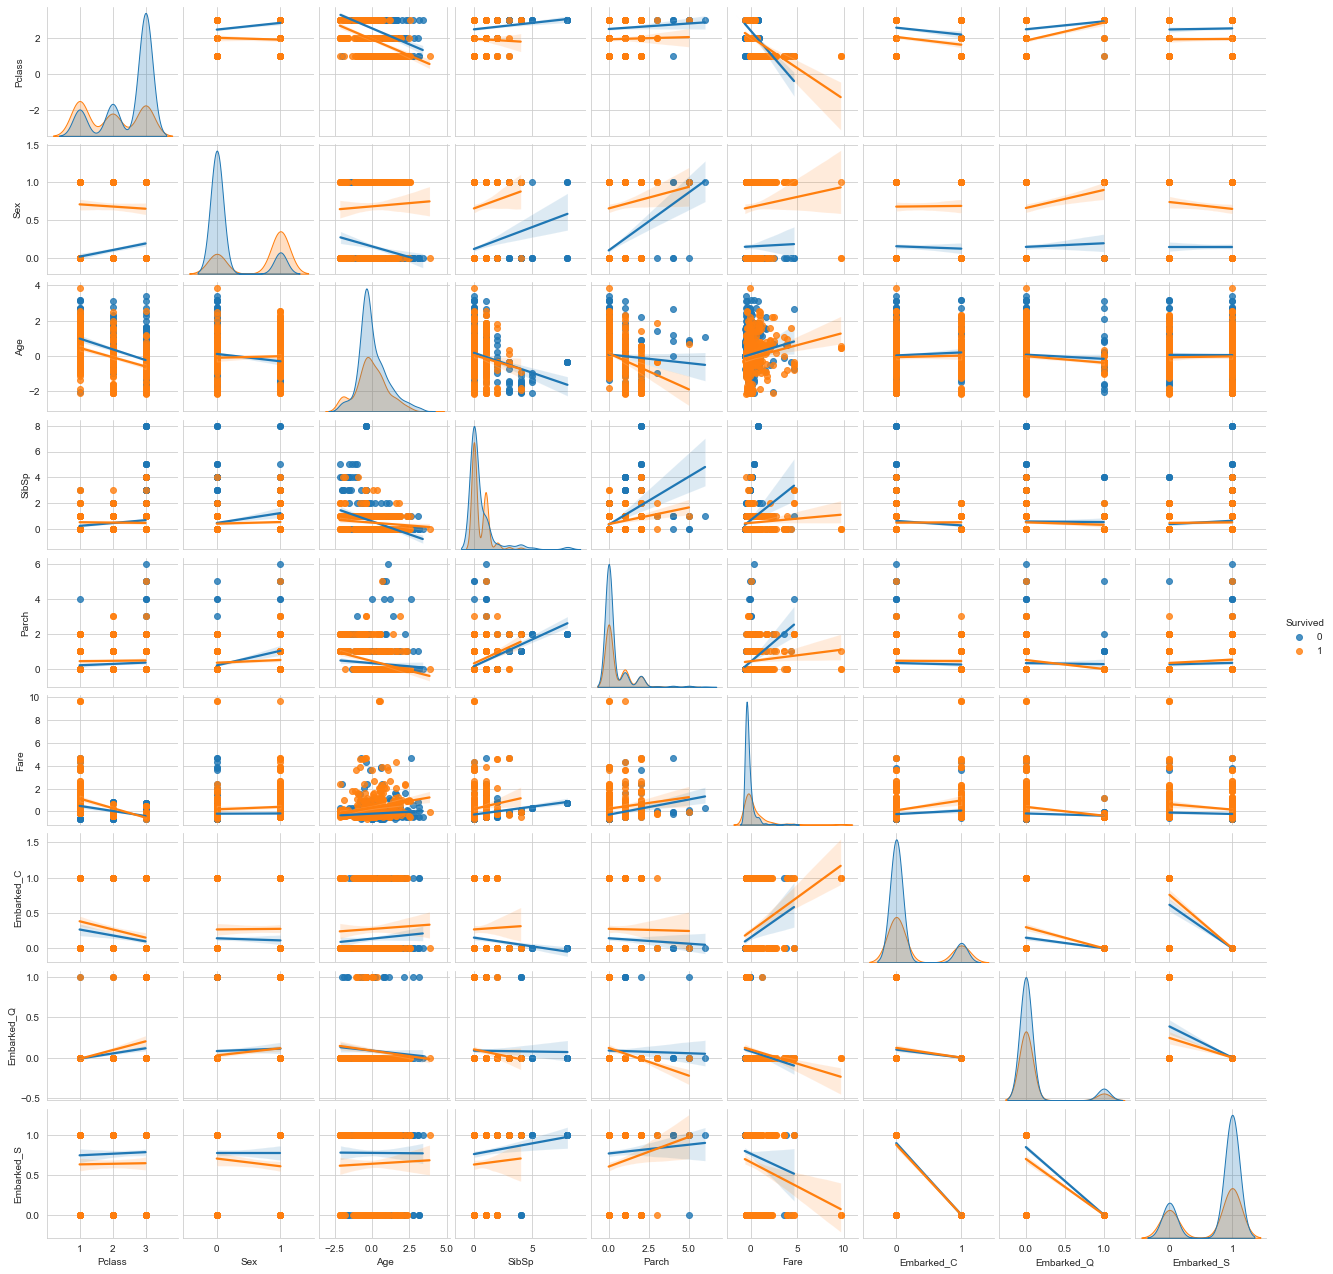

In [62]:
sns.pairplot(Titanic_data, kind = 'reg', hue='Survived' ,size = 2)

In [63]:
# As data points are overlapping we prefer random forest algorithm as it gives good result

## Separating target and feature

In [64]:
y=Titanic_data.Survived.copy()
X=Titanic_data.drop(['Survived'],axis=1)

## Spliting data 

In [65]:
from sklearn.model_selection import train_test_split


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify = y, random_state=2)

In [67]:
print(X.shape, X_train.shape, X_test.shape)

(891, 9) (712, 9) (179, 9)


# Model building

## Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

## Train data

In [69]:
model.fit(X_train,y_train)

LogisticRegression()

In [70]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [71]:
print(X_train_prediction)

[0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1
 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 1 0 0 1 0 1 0 1 

In [72]:
training_data_accuracy = accuracy_score(y_train,X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8089887640449438


## Test data

In [73]:
X_test_prediction = model.predict(X_test)

In [74]:
print(X_test_prediction)

[0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0
 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0
 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0]


In [75]:
test_data_accuracy = accuracy_score(y_test,X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7988826815642458


In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
accuracy=confusion_matrix(y_test,X_test_prediction)

In [78]:
accuracy

array([[94, 16],
       [20, 49]], dtype=int64)

In [79]:
accuracy=accuracy_score(y_test,X_test_prediction)

In [80]:
accuracy

0.7988826815642458

## Random Forest

In [81]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

98.6

In [82]:
models = [LogisticRegression(), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [83]:

models = [LogisticRegression(), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]
def compare_models_train_test():
    for model in models:
        
        # Training the model
        model.fit(X_train, y_train)
        
        #Evaluating the model
        test_data_prediction = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, test_data_prediction)
        print('Accuracy score of the ', model, '=', accuracy)
    

In [84]:
compare_models_train_test()

Accuracy score of the  LogisticRegression() = 0.7988826815642458
Accuracy score of the  SVC(kernel='linear') = 0.776536312849162
Accuracy score of the  KNeighborsClassifier() = 0.8100558659217877
Accuracy score of the  RandomForestClassifier() = 0.8268156424581006


In [85]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000),X,y,cv=5,)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr,2)
print(mean_accuracy_lr)


[0.77653631 0.80898876 0.80337079 0.7752809  0.81460674]
79.58


In [86]:
cv_score_SVC = cross_val_score(SVC(kernel='linear'),X,y,cv=5)

print(cv_score_SVC)

mean_accuracy_SVC = sum(cv_score_SVC)/len(cv_score_SVC)
mean_accuracy_SVC = mean_accuracy_SVC*100
mean_accuracy_SVC = round(mean_accuracy_SVC,2)
print(mean_accuracy_SVC)

[0.80446927 0.80898876 0.78651685 0.75280899 0.78651685]
78.79


In [87]:
cv_score_KN = cross_val_score(KNeighborsClassifier(),X,y,cv=5)

print(cv_score_KN)

mean_accuracy_KN = sum(cv_score_KN)/len(cv_score_KN)
mean_accuracy_KN = mean_accuracy_KN*100
mean_accuracy_KN = round(mean_accuracy_KN,2)
print(mean_accuracy_KN)

[0.77094972 0.78089888 0.80898876 0.8258427  0.79775281]
79.69


In [88]:
 cv_score_RF = cross_val_score(RandomForestClassifier(),X,y,cv=5)

print(cv_score_RF)

mean_accuracy_RF = sum(cv_score_RF)/len(cv_score_RF)
mean_accuracy_RF = mean_accuracy_RF*100
mean_accuracy_RF = round(mean_accuracy_RF,2)
print(mean_accuracy_RF)

[0.7877095  0.79775281 0.86516854 0.76966292 0.82022472]
80.81


### As we can see that accuracy in random forest is more after cross validation

In [89]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Fare,0.274
Sex,0.264
Age,0.245
Pclass,0.087
SibSp,0.048
Parch,0.040
Embarked_S,0.016
Embarked_C,0.015
Embarked_Q,0.010


<AxesSubplot:xlabel='feature'>

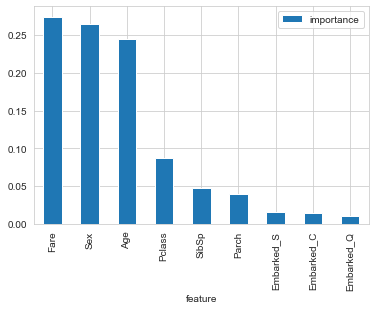

In [90]:
importances.plot.bar()

### Parch,embarked are not that significant

In [91]:
Titanic_data.drop(['Parch','Embarked_S','Embarked_C','Embarked_Q'],axis=1,inplace=True)

In [92]:
#Using random forest again after removal of less significant feature
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

98.6 %


In [95]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[375,  64],
       [ 75, 198]], dtype=int64)

In [96]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7557251908396947
Recall: 0.7252747252747253


 Our model predicts 75.57% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 77.52 % of the people who actually survived. 

### 1. Both male and female from age group 15-40 likely to survive.
### 2. people travelling with first class which is having higher fare rates likely to survive .